In [9]:
from Transform import *
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for customer DataFrame
data_customer = {
    'customer_id': [1, 2, 3, 4],
    'first_name': ['John', 'Jane', 'Alice', 'Bob'],
    'last_name': ['Doe', 'Smith', 'Johnson', 'Brown'],
    'email': ['john.doe@example.com', 'jane.smith@example.com', 'alice.johnson@example.com', 'bob.brown@example.com']
}

# Sample data for reservation DataFrame
data_reservation = {
    'reservation_id': [101, 102, 103, 104],
    'customer_id': [1, 2, 3, 4],
    'reservation_date': ['2023-10-01', '2023-10-02', '2023-10-03', '2023-10-04'],
    'total_price': [100, 200, 150, 300]
}

# Sample data for payment DataFrame
data_payment = {
    'reservation_id': [101, 102, 103, 104],
    'payment_date': ['2023-10-01', '2023-10-02', None, '2023-10-04'],
    'payment_status': ['Paid', 'Paid', 'Pending', 'Paid']
}



In [10]:
# Create DataFrames
df_customer = pd.DataFrame(data_customer)
df_reservation = pd.DataFrame(data_reservation)
df_payment = pd.DataFrame(data_payment)

# Display the DataFrames
print("Customer DataFrame:")
print(df_customer)
print("\nReservation DataFrame:")
print(df_reservation)
print("\nPayment DataFrame:")
print(df_payment)



Customer DataFrame:
   customer_id first_name last_name                      email
0            1       John       Doe       john.doe@example.com
1            2       Jane     Smith     jane.smith@example.com
2            3      Alice   Johnson  alice.johnson@example.com
3            4        Bob     Brown      bob.brown@example.com

Reservation DataFrame:
   reservation_id  customer_id reservation_date  total_price
0             101            1       2023-10-01          100
1             102            2       2023-10-02          200
2             103            3       2023-10-03          150
3             104            4       2023-10-04          300

Payment DataFrame:
   reservation_id payment_date payment_status
0             101   2023-10-01           Paid
1             102   2023-10-02           Paid
2             103         None        Pending
3             104   2023-10-04           Paid


In [11]:
# Test inner_join function
df_joined = inner_join(df_customer, df_reservation, 'customer_id')
print("\nJoined DataFrame (Customer + Reservation):")
print(df_joined)




Joined DataFrame (Customer + Reservation):
   customer_id first_name last_name                      email  \
0            1       John       Doe       john.doe@example.com   
1            2       Jane     Smith     jane.smith@example.com   
2            3      Alice   Johnson  alice.johnson@example.com   
3            4        Bob     Brown      bob.brown@example.com   

   reservation_id reservation_date  total_price  
0             101       2023-10-01          100  
1             102       2023-10-02          200  
2             103       2023-10-03          150  
3             104       2023-10-04          300  


In [12]:
# Test handling_col function
df_transformed = handling_col(df_joined)
print("\nTransformed DataFrame (After handling_col):")
print(df_transformed)


Transformed DataFrame (After handling_col):
   customer_id first_name last_name                      email  \
0            1       John       Doe       john.doe@example.com   
1            2       Jane     Smith     jane.smith@example.com   
2            3      Alice   Johnson  alice.johnson@example.com   
3            4        Bob     Brown      bob.brown@example.com   

   reservation_id reservation_date  total_price      full_name currency  \
0             101       2023-10-01          100       John Doe      IDR   
1             102       2023-10-02          200     Jane Smith      IDR   
2             103       2023-10-03          150  Alice Johnson      IDR   
3             104       2023-10-04          300      Bob Brown      IDR   

  email_domain  
0  example.com  
1  example.com  
2  example.com  
3  example.com  


In [13]:
# Test select_col function
df_selected = select_col(df_transformed)
print("\nSelected Columns DataFrame:")
print(df_selected)


Selected Columns DataFrame:
   reservation_id      full_name                      email email_domain  \
0             101       John Doe       john.doe@example.com  example.com   
1             102     Jane Smith     jane.smith@example.com  example.com   
2             103  Alice Johnson  alice.johnson@example.com  example.com   
3             104      Bob Brown      bob.brown@example.com  example.com   

  reservation_date  total_price currency  
0       2023-10-01          100      IDR  
1       2023-10-02          200      IDR  
2       2023-10-03          150      IDR  
3       2023-10-04          300      IDR  


In [14]:
# Test check_missing_value function
missing_info = check_missing_value(df_payment)
print("\nMissing Values Info:")
print(missing_info)




Missing Values Info:
                Missing Values  Missing Percentage
reservation_id               0                 0.0
payment_date                 1                25.0
payment_status               0                 0.0


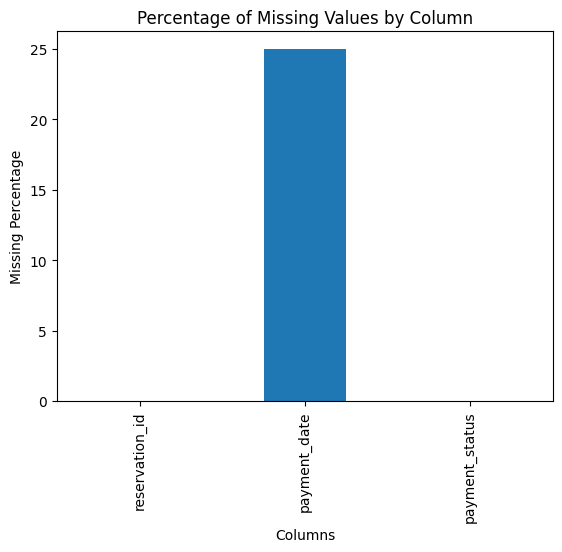

In [15]:
# Test visualize_missing_values function
visualize_missing_values(df_payment)

In [16]:
# Test fill_missing_values function
df_filled = fill_missing_values(df_payment)
print("\nDataFrame After Filling Missing Values:")
print(df_filled)


DataFrame After Filling Missing Values:
   reservation_id  payment_date payment_status
0             101    2023-10-01           Paid
1             102    2023-10-02           Paid
2             103  Missing Data        Pending
3             104    2023-10-04           Paid


In [17]:
df_filled.isna().sum()

reservation_id    0
payment_date      0
payment_status    0
dtype: int64